In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.utils.data as udata
import torch.optim as optim

#from sklearn.preprocessing import StandardScaler
from scipy.stats import norm

In [17]:
#epochs        = 30
#n_layers      = 3
#n_nodes       = 36
#n_outputs     = 2
#drop_out_p    = 0.0
#learning_rate = 0.001
#batch_size    = 1000
#verbose       = True

#x=60um  y=72um
# tanh
# adam
# pmax>10 && pmax>5

In [27]:
#epochs        = 70
#n_layers      = 3
#n_nodes       = 36
#n_outputs     = 2
#drop_out_p    = 0.0
#learning_rate = 0.001
#batch_size    = 1000
#verbose       = True

In [38]:
epochs        = 30
n_layers      = 4
n_nodes       = 36
n_outputs     = 2
drop_out_p    = 0.0
learning_rate = 0.001
batch_size    = 1000
verbose       = True

/tmp/ipykernel_547/1924697126.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['x_tracker'] += -0.05
/tmp/ipykernel_547/1924697126.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['y_tracker'] += 0.05


Total training events =  21957 918
Index(['pmax3', 'pmax4', 'pmax5', 'pmax6', 'pmax7', 'pmax8', 'pmax9', 'pmax11',
       'pmax14', 'negpmax3', 'negpmax4', 'negpmax5', 'negpmax6', 'negpmax7',
       'negpmax8', 'negpmax9', 'negpmax11', 'negpmax14'],
      dtype='object') 18
Index(['x_tracker', 'y_tracker'], dtype='object') 2


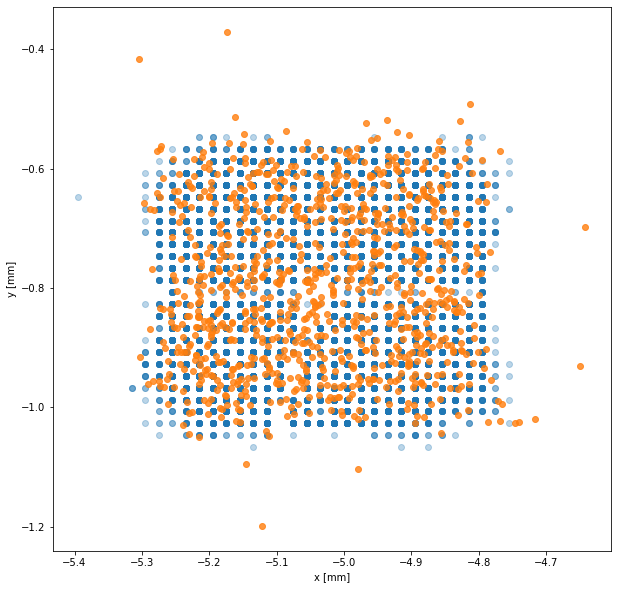

In [39]:
path = './'
#df_train = pd.read_csv('csv_TB3_Run21_croci450um_W3_285V_150kWfm.csv', sep=',')
df_train = pd.read_csv('csv_croci450-RSD2_Run111_285V_49.3pc_W3.csv', sep=',')
#df_test = pd.read_csv('csv_TB3_Run20_croci450um_W3_285V_40kWfm.csv', sep=',')
df_test = pd.read_csv('csv_TB3_Run20_croci450um_W3_285V_40kWfm.csv', sep=',')

df_train = df_train.dropna(axis=1)
df_test = df_test.dropna(axis=1)
df_train = df_train.dropna(axis=0)
df_test = df_test.dropna(axis=0)

Train = df_train
Test = df_test

#x_low = -1
#x_up = 1
#y_low = -0.6
#y_up = 0.8
x_low = -5.475
x_up = -4.575
y_low = -1.232
y_up = -0.332


train = Train[ (Train['x_tracker']>(x_low) ) & (Train['x_tracker']<(x_up)) \
              & (Train['y_tracker']>(y_low)) & (Train['y_tracker']<(y_up)) ]

test = Test[ (Test['x_tracker']>x_low) & (Test['x_tracker']<x_up) & (Test['y_tracker']>y_low) \
              & (Test['y_tracker']<y_up) ]

train['x_tracker'] += -0.05
#test ['x_tracker'] += 5.0
train['y_tracker'] += 0.05
#test ['y_tracker'] += 1.0

train = train[ (train['pmax6']>train['pmax1']) & (train['pmax6']>train['pmax2']) & (train['pmax6']>train['pmax3']) \
        & (train['pmax6']>train['pmax4']) & (train['pmax6']>train['pmax5']) & (train['pmax6']>train['pmax7']) \
        & (train['pmax6']>train['pmax8']) & (train['pmax6']>train['pmax9']) & (train['pmax6']>train['pmax11']) \
        & (train['pmax6']>train['pmax12']) & (train['pmax6']>train['pmax13']) & (train['pmax6']>train['pmax14']) ]

test = test[ (test['pmax6']>test['pmax1']) & (test['pmax6']>test['pmax2']) & (test['pmax6']>test['pmax3']) \
        & (test['pmax6']>test['pmax4']) & (test['pmax6']>test['pmax5']) & (test['pmax6']>test['pmax7']) \
        & (test['pmax6']>test['pmax8']) & (test['pmax6']>test['pmax9']) & (test['pmax6']>test['pmax11']) \
        & (test['pmax6']>test['pmax12']) & (test['pmax6']>test['pmax13']) & (test['pmax6']>test['pmax14']) ]

train = train[ (train['pmax6']>=10) ]
test = test[ (test['pmax6']>=5) ]
train = train[ (train['negpmax6']>=-100) ]
test = test[ (test['negpmax6']>=-100) ]

print("Total training events = ", len(train), len(test))

y_train = train.iloc[:,:2]
x_train = train.drop(['x_tracker','y_tracker','x_rsd','y_rsd','t','t_reco','pmax0','negpmax0','tmax0'],axis=1)
x_train = x_train.drop(['pmax1','pmax2','pmax12','pmax13','negpmax1','negpmax2','negpmax12','negpmax13'],axis=1)
x_train = x_train.iloc[:,:18]
#x_train = x_train.iloc[:,:26]
#x_train['diff3'] = x_train['pmax3']+x_train['negpmax3']


y_test = test.iloc[:,:2]
x_test = test.drop(['x_tracker','y_tracker','x_rsd','y_rsd','t','t_reco','pmax0','negpmax0','tmax0'],axis=1)
x_test = x_test.drop(['pmax1','pmax2','pmax12','pmax13','negpmax1','negpmax2','negpmax12','negpmax13'],axis=1)
x_test = x_test.iloc[:,:18]
#x_test = x_test.iloc[:,:26]
#x_test['diff3'] = x_test['pmax3']+x_test['negpmax3']

n_var     = len(x_test.columns)
n_outputs = len(y_test.columns)
print(x_test.columns, n_var)
print(y_test.columns, n_outputs)

y_train = torch.tensor(y_train.values)
x_train = torch.tensor(x_train.values)

y_test = torch.tensor(y_test.values)
x_test = torch.tensor(x_test.values)

plt.figure(figsize=(10,10))
#plt.xlim(-100.0,100.0)
#plt.ylim(-100.0,100.0)
#plt.xlim(-20.0,20.0)
#plt.ylim(-20.0,20.0)
plt.xlabel("x [mm]")
plt.ylabel("y [mm]")
plt.scatter(y_train[:,0], y_train[:,1], alpha=.3)
plt.scatter(y_test[:,0], y_test[:,1], alpha=.8)


m_train = x_train.mean(0, keepdim=True)
s_train = x_train.std(0, unbiased=False, keepdim=True)
x_train -= m_train
x_train /= s_train

m_train_y = y_train.mean(0, keepdim=True)
s_train_y = y_train.std(0, unbiased=False, keepdim=True)
y_train -= m_train_y
y_train /= s_train_y

m_test = x_test.mean(0, keepdim=True)
s_test = x_test.std(0, unbiased=False, keepdim=True)
x_test -= m_test
x_test /= s_test

m_test_y = y_test.mean(0, keepdim=True)
s_test_y = y_test.std(0, unbiased=False, keepdim=True)
y_test -= m_test_y
y_test /= s_test_y

train_tensor = udata.TensorDataset(x_train, y_train) 
test_tensor  = udata.TensorDataset(x_test,  y_test) 

#loader_train = udata.DataLoader(dataset=train_tensor, batch_size=batch_size, num_workers=0, shuffle=True)
loader_train = udata.DataLoader(dataset=train_tensor, batch_size=batch_size, num_workers=0, shuffle=True)
loader_test  = udata.DataLoader(dataset=test_tensor,  batch_size=batch_size, num_workers=0, shuffle=True)

In [40]:
# Model
class DNN(nn.Module):
    def __init__(self, n_var, n_layers, n_nodes, n_outputs, drop_out_p):
        super(DNN, self).__init__()
        layers = []
        layers.append(nn.Linear(n_var, n_nodes))
        layers.append(nn.ReLU())
        #layers.append(nn.Tanh())

        for n in list(n_nodes for x in range(n_layers)):
            print(n)
            layers.append(nn.Linear(n, n))
            layers.append(nn.ReLU())
            #layers.append(nn.Tanh())

        layers.append(nn.Dropout(p=drop_out_p))
        layers.append(nn.Linear(n_nodes, n_outputs))

        self.dnn = nn.Sequential(*layers)
        self.double()

    def forward(self, x):
        return self.dnn(x)

model = DNN(n_var=n_var, n_layers=n_layers, n_nodes=n_nodes, n_outputs=n_outputs, drop_out_p=drop_out_p)

# Loss function
criterion = nn.MSELoss()

# Optimizer
optimizer = optim.Adam(model.parameters(), lr = learning_rate, weight_decay=1e-3)
#optimizer = optim.SGD(model.parameters(), lr = learning_rate, weight_decay=1e-3)

#scheduler = optim.lr_scheduler.ExponentialLR(optimizer=optimizer, gamma=0.95, last_epoch=-1, verbose=verbose)

36
36
36
36


In [41]:
# training and validation
training_losses_total = np.zeros(epochs)
validation_losses_total = np.zeros(epochs)
for epoch in range(epochs):
    if verbose: print("Beginning epoch " + str(epoch))
    # training
    train_loss_total = 0
    for i, data in enumerate(loader_train,0):
        x, y = data
        #x = data[0]
        #y = data[1]
        model.train()
        model.zero_grad()
        optimizer.zero_grad()
        output = model(x)
        #print(output)
        #print(x)
        #break
        batch_loss_total = criterion(output, y)        
        batch_loss_total.backward()
        optimizer.step()
        model.eval()
        train_loss_total += batch_loss_total.item()
    train_loss_total /= len(loader_train)
    training_losses_total[epoch] = train_loss_total
    if np.isnan(train_loss_total):
        print("nan in training")
        break
    if verbose: print("t_total: "+ str(train_loss_total))

    # validation
    val_loss_total = 0
    for i, data in enumerate(loader_test):
        x, y = data
        #x = data[0]
        #y = data[1]
        output = model(x)
        batch_loss_total = criterion(output, y)        
        val_loss_total += batch_loss_total.item()
    val_loss_total /= len(loader_test)
    #scheduler.step()
    validation_losses_total[epoch] = val_loss_total
    if np.isnan(val_loss_total):
        print("nan in val")
        break
    if verbose: print("v_total: "+ str(val_loss_total))
    
    # save the model
    model.eval()
    #modelLocation = "{}/net_{}.pth".format(".",epoch)
    #torch.save(model.state_dict(), modelLocation)
    
print("Finished")
print("Final loss train:", training_losses_total[-1])
print("Final loss test:",  validation_losses_total[-1])

Beginning epoch 0
t_total: 0.9847694792237696
v_total: 0.9544614786331559
Beginning epoch 1
t_total: 0.8753281567856909
v_total: 0.763366084757926
Beginning epoch 2
t_total: 0.6870553795863507
v_total: 0.6798272468421629
Beginning epoch 3
t_total: 0.548041606400841
v_total: 0.46347907983619946
Beginning epoch 4
t_total: 0.39773258399772793
v_total: 0.4128177212820174
Beginning epoch 5
t_total: 0.3684279943353463
v_total: 0.3948439576863191
Beginning epoch 6
t_total: 0.35894527143818605
v_total: 0.3862839368939632
Beginning epoch 7
t_total: 0.3546077648908874
v_total: 0.3828142899530564
Beginning epoch 8
t_total: 0.35151222309404817
v_total: 0.3740482609897912
Beginning epoch 9
t_total: 0.34774921605905385
v_total: 0.3715431835388351
Beginning epoch 10
t_total: 0.34544155811991406
v_total: 0.3687461416674501
Beginning epoch 11
t_total: 0.3441280623354049
v_total: 0.3678125547691926
Beginning epoch 12
t_total: 0.34211406026698193
v_total: 0.36451511967033834
Beginning epoch 13
t_total: 0

Making basic validation plots


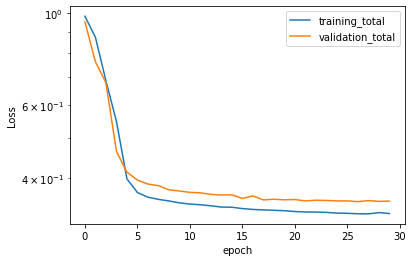

In [42]:
# plot loss/epoch for training and validation sets
print("Making basic validation plots")
training_total = plt.plot(training_losses_total, label='training_total')
validation_total = plt.plot(validation_losses_total, label='validation_total')
plt.yscale("log")
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()
#plt.savefig("loss_plot.png")

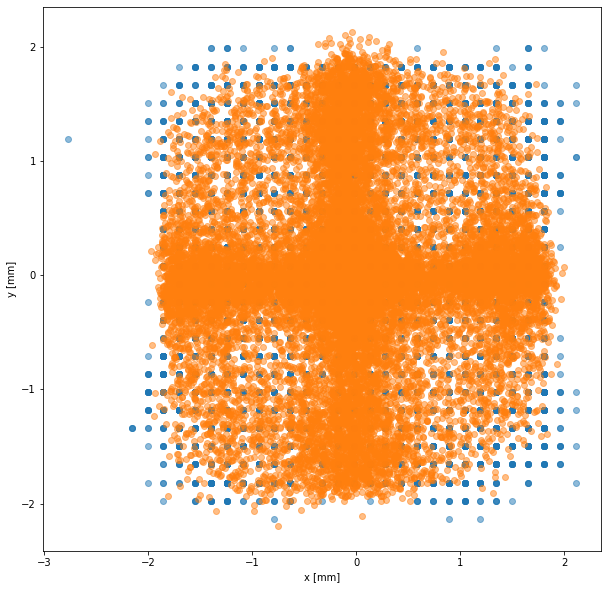

In [43]:
plt.figure(figsize=(10,10))
#plt.xlim(-10.0,10.0)
#plt.ylim(-10.0,10.0)
#plt.xlim(-2.0,2.0)
#plt.ylim(-2.0,2.0)
plt.xlabel("x [mm]")
plt.ylabel("y [mm]")

plt.scatter(y_train[:,0], y_train[:,1], alpha=.5)
plt.scatter(model(x_train).detach().numpy()[:,0], model(x_train).detach().numpy()[:,1], alpha=.5)

#plt.savefig('/home/federico/Scrivania/croci450_2d.png')

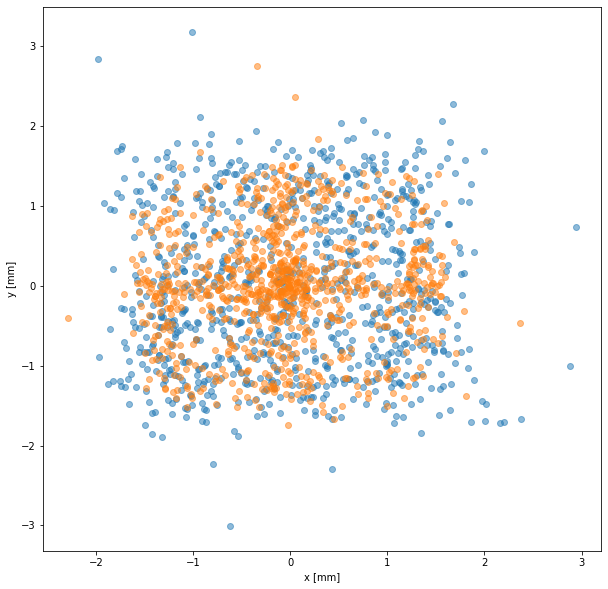

In [44]:
plt.figure(figsize=(10,10))
#plt.xlim(-10.0,10.0)
#plt.ylim(-10.0,10.0)
#plt.xlim(-2.0,2.0)
#plt.ylim(-2.0,2.0)
plt.xlabel("x [mm]")
plt.ylabel("y [mm]")

model.eval()

plt.scatter(y_test[:,0], y_test[:,1], alpha=.5)
plt.scatter(model(x_test).detach().numpy()[:,0], model(x_test).detach().numpy()[:,1], alpha=.5)

#plt.savefig('/home/federico/Scrivania/croci450_2d.png')

Sigma x-axis: 0.070768062654417
Sigma y-axis: 0.07560210838490006


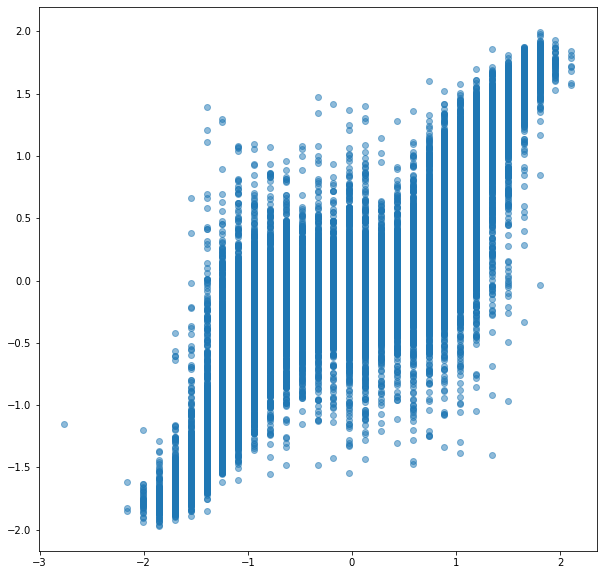

In [45]:
plt.figure(figsize=(10,10))

yhat = model(x_train).detach().numpy()
yres = (y_train-yhat)*s_train_y
plt.scatter(y_train[:,0],yhat[:,0],alpha=.5)

hist_x = yres[1:,0]
hist_y = yres[1:,1]

mu_x, sigma_x = norm.fit(hist_x)
mu_y, sigma_y = norm.fit(hist_y)
print('Sigma x-axis: '+str(sigma_x))
print('Sigma y-axis: '+str(sigma_y))

#np.savetxt('croci450_run_laser-20.txt', yres.numpy(), fmt='%f')

Sigma x-axis: 0.07913147358993679
Sigma y-axis: 0.07957048781611734


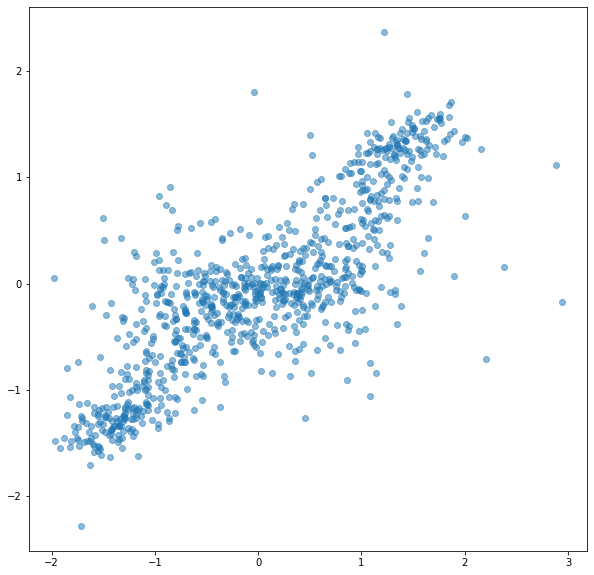

In [46]:
plt.figure(figsize=(10,10))

yhat = model(x_test).detach().numpy()
yres = (y_test-yhat)*s_test_y
plt.scatter(y_test[:,0],yhat[:,0],alpha=.5)

hist_x = yres[1:,0]
hist_y = yres[1:,1]

mu_x, sigma_x = norm.fit(hist_x)
mu_y, sigma_y = norm.fit(hist_y)
print('Sigma x-axis: '+str(sigma_x))
print('Sigma y-axis: '+str(sigma_y))

np.savetxt('croci450_run_laser-20.txt', yres.numpy(), fmt='%f')